# Notebook 4 - Pricila Badilla

## Ejercicios
## 1) y 2)

BD rescatada del ejercicio Notebook 3. 

Aquí se puede consultar los datos de todas las personas registradas en la base de datos Valdivia, y obtener los datos en función de un nombre o RUT. Otra función es la consulta de todas las categorias, dando como resultado el nombre de cada una y el id del lugar al que representa. También se puede filtrar los lugares dependiendo del nombre de categoría.

In [2]:
import flask
import json
from flask import request, jsonify
import mysql.connector

# Creación de una nueva aplicación web
app = flask.Flask(__name__)

# Conexión al SGBD
  ## reemplazar 'root' por el password del usuario administrador de MySQL
conn = mysql.connector.connect(user="root",host="localhost",password="94209420")
cursor = conn.cursor()
cursor.execute("USE valdivia")

# Definición de las rutas

@app.route('/', methods=['GET'])
def home():
    return '''<h1>API Valdivia</h1>
<p>Un prototipo de API para la base de datos "Valdivia".</p>'''

@app.errorhandler(404)
def page_not_found(e):
    return "<h1>404</h1><p>The resource could not be found.</p>", 404

@app.route('/api_valdivia/v1/resources/persona/all', methods=['GET'])
def api_all():
    result=cursor.execute('SELECT nombre,pk_RUT,edad FROM persona;')
    all_personas =cursor.fetchall()
    ## Conservar el nombre de los atributos
    row_headers=[x[0] for x in cursor.description]
    ## Transformar resultados en datos JSON
    json_data=[]
    for result in all_personas:
        json_data.append(dict(zip(row_headers,result)))
    return jsonify(json_data)

@app.route('/api_valdivia/v1/resources/categoria/all', methods=['GET'])
def api_categoria():
    result=cursor.execute('SELECT * FROM categoria;')
    all_categoria =cursor.fetchall()
    ## Conservar el nombre de los atributos
    row_headers=[x[0] for x in cursor.description]
    ## Transformar resultados en datos JSON
    json_data=[]
    for result in all_categoria:
        json_data.append(dict(zip(row_headers,result)))
    return jsonify(json_data)

@app.route('/api_valdivia/v1/resources/categoria', methods=['GET'])
def api_filter():
    ## Definir parametros posibles
    query_parameters = request.args

    nombre_cat = query_parameters.get('nombre_cat')
    
    ##Construir la consulta SQL según parametros
    query = "SELECT nombre_cat, pk_lugar FROM categoria WHERE"
    to_filter = []

    if nombre_cat:
        query += ' nombre_cat=%s AND'
        to_filter.append(nombre_cat)
    #if not (release_year):
    #    return page_not_found(404)

    query = query[:-4] + ';'
    
    print(query)
    print(to_filter)
    
    ## Consultar
    results=cursor.execute(query,to_filter)
    some_films =cursor.fetchall()
    ## Conservar el nombre de los atributos
    row_headers=[x[0] for x in cursor.description]
    ## Transformar resultados en datos JSON
    json_data=[]
    for result in some_films:
        json_data.append(dict(zip(row_headers,result)))
    return jsonify(json_data)


@app.route('/api_valdivia/v1/resources/persona', methods=['GET'])
def api_filterC():
    ## Definir parametros posibles
    query_parameters = request.args

    nombre = query_parameters.get('nombre')
    pk_RUT = query_parameters.get('pk_RUT')
    
    ##Construir la consulta SQL según parametros
    query = "SELECT * FROM persona WHERE"
    to_filter = []

    if nombre:
        query += ' nombre=%s AND'
        to_filter.append(nombre)
    if pk_RUT:
        query+= ' pk_RUT=%s AND'
        to_filter.append(pk_RUT)
    #if not (release_year):
    #    return page_not_found(404)

    query = query[:-4] + ';'
    
    print(query)
    print(to_filter)
    
    ## Consultar
    results=cursor.execute(query,to_filter)
    some_films =cursor.fetchall()
    ## Conservar el nombre de los atributos
    row_headers=[x[0] for x in cursor.description]
    ## Transformar resultados en datos JSON
    json_data=[]
    for result in some_films:
        json_data.append(dict(zip(row_headers,result)))
    return jsonify(json_data)



app.run(debug=False,port=1234)

 * Running on http://127.0.0.1:1234/ (Press CTRL+C to quit)


### Consulta todas personas

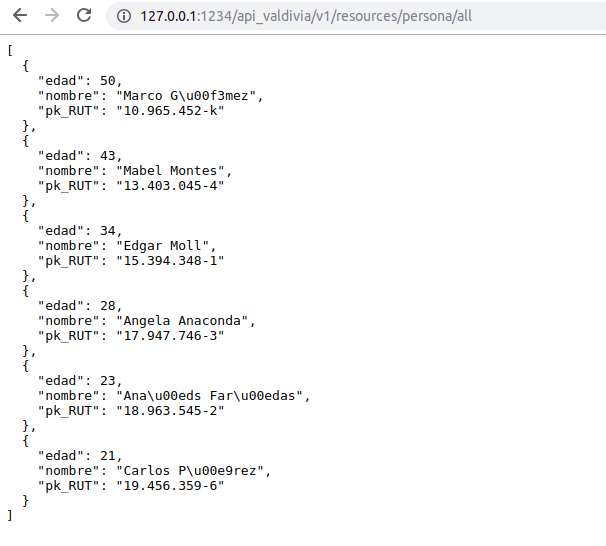

### Consulta por una Mabel Montes

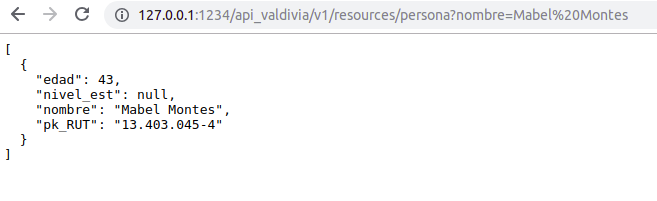

### Consula lugares que incluyen categoría "comercio"

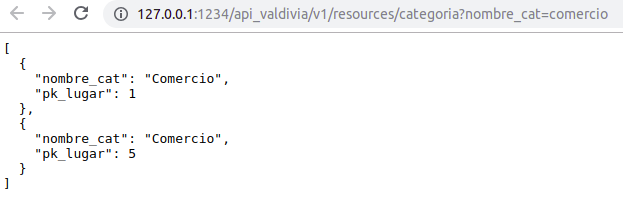

## 3) ¿Cómo podrían desplegar su API más allá de su computador local?

No todas las APIs web son accesibles libremente y sin restricción, en la mayoría existe una autetificación del usuario. Una de las formas en por *access key* que identifica al usuario de forma única. De esta manera se podrá desplegar una API sin necesidad de ser *root* por medio de una identificación.

## 4) ¿Observan algunas limitaciones al momento de crear una API web basada en Mysql?

Con una BD relacional ocurre un problema cuando nos encontramos con nuevos evolutivos que obliguen a realizar modificaciones en el modelo conceptual de la BD. Mysql siendo una BD relacional tiene este tipo de limitaciones. En cambio, en una BD no relacional, como MongoDB, no tiene por qué existir ningún tipo de relación entre los datos (aunque sí puede), se tiene una BD sin un esquema estrictamente definido. Las BD relacionales trabajan con formato JSON y representan mayor flexibilidad al cambio, en comparación con una BD relacional como Mysql. 

## 5) ¿Qué es el movimiento Open Data? ¿En qué sentido podría aportar a la ciudad de Valdivia?

Open Data son datos que pueden ser utilizados, reutilizados y redistribuidos libremente por cualquier persona. Representan transparencia.

También se relacionan con poder ofrecer a la ciudadanía, en este caso valdiviana, todos los conocimientos necesarios que resulten en un mayor aprovechamiento de los recursos, y así enriquecer su conocimiento para promover una mayor participación. Esto llevaría a la innovación y a enfocarse en los problemas de la ciudad conectando todos sus actores para su mejora.  